In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import ensemble

In [78]:
data=pd.read_csv(r"C:\Users\naruk\OneDrive\Desktop\heart.csv")
data


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [3]:
sex=data.pop('sex')
data['male']=(sex==1)*1.0
data['female']=(sex==0)*1.0
cp=data.pop('cp')
data['a']=(cp==0)*1.0
data['b']=(cp==1)*1.0
data['c']=(cp==2)*1.0
data['d']=(cp==3)*1.0
fbs=data.pop("fbs")
data['x']=(fbs==0)*1.0
data['y']=(fbs==1)*1.0

In [4]:
rest=data.pop('restecg')
data['p']=(rest==0)*1.0
data['q']=(rest==1)*1.0
data['r']=(rest==2)*1.0
exang=data.pop('exang')
data['i']=(exang==0)*1.0
data['j']=(exang==1)*1.0
slope=data.pop("slope")
data['f']=(slope==1)*1.0
data['g']=(slope==0)*1.0
data['h']=(slope==2)*1.0
ca=data.pop("ca")
data['k']=(ca==0)*1.0
data['l']=(ca==1)*1.0
data['m']=(ca==2)*1.0
data['n']=(ca==3)*1.0
thal=data.pop("thal")
data['o']=(thal==0)*1.0
data['t']=(thal==1)*1.0
data['u']=(thal==2)*1.0
data['v']=(thal==3)*1.0

In [5]:


y=data.target
x=data.drop("target",axis=1)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [33]:
from sklearn import linear_model
model=ensemble.RandomForestClassifier(n_estimators=100)
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y,test_size=0.2,random_state=5)

In [34]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [47]:
adaboost=ensemble.AdaBoostClassifier(base_estimator=model,n_estimators=100,learning_rate=1)

In [48]:
from sklearn import ensemble

In [49]:
boost=adaboost.fit(x_train,y_train)

In [50]:
boost.score(x_test,y_test)

0.9180327868852459

In [57]:
from xgboost import XGBClassifier

In [104]:
m=XGBClassifier(learning_rate=0.1,n_estimators=1000)

In [144]:
m.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [143]:
m.score(x_test,y_test)

0.9016393442622951

In [128]:
import tsne

In [139]:
tsne_data=tsne.bh_sne(sc.fit_transform(data),max_iter=1000,perplexity=40,d=3)

In [140]:
tsne_data=pd.DataFrame(tsne_data,columns=("first","second","third"))

In [141]:
tsne_data['label']=data.target

In [142]:
import plotly.express as px
px.scatter_3d(tsne_data,x="first",y="second",z="third",color="label")

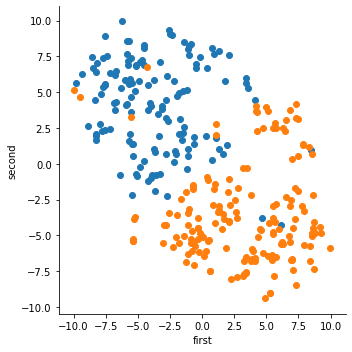

In [119]:
sns.FacetGrid(data=tsne_data,hue="label",size=5).map(plt.scatter,"first","second")

In [107]:
from sklearn.manifold import TSNE
v=TSNE()

In [111]:
tsne_=v.fit_transform(sc.fit_transform(data))

In [113]:
tsne_=pd.DataFrame(tsne_,columns=("first","second"))

In [114]:
tsne_["label"]=data.target

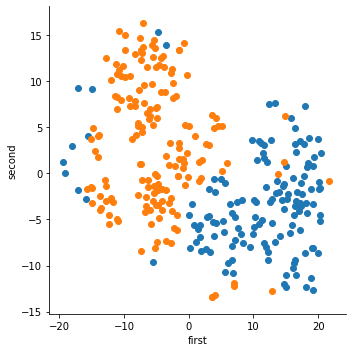

In [126]:
sns.FacetGrid(data=tsne_,hue="label",size=5).map(plt.scatter,"first","second")

In [131]:
a=tsne.BH_SNE_3D(sc.fit_transform(data))

In [132]:
print(a)

In [134]:
a.run


<function BH_SNE_3D.run>

In [138]:
print(a.run)

<built-in method run of tsne.bh_sne_3d.BH_SNE_3D object at 0x000001CE1F8BDF90>
